# Homework #0: Solutions
## Review of Stastistical Modeling and Scientific Computing

**AM 207: Advanced Scientific Computing**<br>
**Instructor: Weiwei Pan**<br>
**Fall 2021**

### Instructions:

**Submission Format:** Use this notebook as a template to complete your homework. Please intersperse text blocks (using Markdown cells) amongst `python` code and results -- format your submission for maximum readability. Your assignments will be graded for correctness as well as clarity of exposition and presentation -- a “right” answer by itself without an explanation or is presented with a difficult to follow format will receive no credit.

**Code Check:** Before submitting, you must do a "Restart and Run All" under "Kernel" in the Jupyter or colab menu. Portions of your submission that contains syntactic or run-time errors will not be graded.

**Libraries and packages:** Unless a problems specifically asks you to implement from scratch, you are welcomed to use any `python` library package in the standard Anaconda distribution.

In [1]:
### Import basic libraries
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

## Part I: Maximum Likelihood Estimators for Linear Regression
### (Material covered in CS109A or equivalent)
In this problem, you are given a dataset with a single predictor $X$ and a single outcome $y$, and your task is to fit a linear model to the data. The dataset is saved as `HW0_data.csv` in CSV (Comma Separated Values) format and can be read using the `.read_csv()` function from the `pandas` library.

Assume that the outcome $y$ can be modeled by the following process:
\begin{aligned}
y &= f(x) + \epsilon = w_1x + w_0 + \epsilon, \quad \epsilon \sim \mathcal{N}(0, 0.5)
\end{aligned}
where $w_1$ and $w_0$, the *parameters* of the function $f$, are unknown constants. 

1. **(Model Building)** Write the analytical expression for the likelihood function $p(y|x, w_1, w_0)$, for a single observation $(x, y)$. Write the analytical expression for the likelihood function $\prod_{n=1}^N p(y_n|x_n, w_1, w_0)$ for an entire dataset of $N$ number of observations.

  *Hint: for a given $x$ and fixed parameters, what is the distribution of $y$?*
  
  
**Solution:** Since $\epsilon$ in the above model is a random variable, so is $y$. Since $w_1$ and $w_0$ are constants, the distribution of $y$ should be that of $\epsilon$ translated by $f(x)$. That is, 
$$
p(y|x, w_1, w_0) = \mathcal{N}(y; w_1x + w_0, 0.5) = \frac{1}{\sqrt{2\pi 0.5}} \exp\left\{-\frac{(y - (w_1x + w_0))^2}{2 * 0.5} \right\}.
$$
The joint likelihood for an entire dataset of $N$ observations is therefore:
$$
\prod_{n=1}^N p(y_n|x_n, w_1, w_0) =\prod_{n=1}^N \frac{1}{\sqrt{2\pi 0.5}} \exp\left\{-\frac{(y - (w_1x + w_0))^2}{2 * 0.5} \right\} = \left(\frac{1}{\sqrt{2\pi 0.5}}\right)^N \exp\left\{-\frac{\sum_{n=1}^N (y - (w_1x + w_0))^2}{2 * 0.5} \right\}.
$$


2. **(Defining a Learning Objective)** The Maximum Likelihood Estimators (MLE) of $w_1$ and $w_0$ are defined as
\begin{aligned}
w^{\text{MLE}}_1, w^{\text{MLE}}_0 = \underset{w_1, w_0}{\mathrm{argmax}}\; \prod_{n=1}^N p(y_n | x_n, w_1, w_0)
\end{aligned}
Show that finding $w_1$ and $w_0$ that maximizes the likelihood is equivalent to finding parameters that minimize the Mean Squared Error (MSE) of your model.
*Hint:* show that maximizing the log likelihood is equivalent to minimizing the MSE.

**Solution:** Recall that the logarithmic functions are monotone -- if $z_1 < z_2$ then $\log(z_1) < \log(z_2)$. This means that the values $w_1, w_0$ that will maximize the likelihood $\prod_{n=1}^N p(y | x, w_1, w_0)$ are the same ones that will maximize the log-likelihood $\log \prod_{n=1}^N p(y | x, w_1, w_0)$ (and vice versa). Hence, maximizing the likelihood is equivalent to maximizing the log-likelihood:
\begin{aligned}
w^{\text{MLE}}_1, w^{\text{MLE}}_0 = \underset{w_1, w_0}{\mathrm{argmax}}\; \prod_{n=1}^N p(y_n | x_n, w_1, w_0) = \underset{w_1, w_0}{\mathrm{argmax}}\; \log \left[\prod_{n=1}^N p(y_n | x_n, w_1, w_0)\right].
\end{aligned}

Now the log-likelihood can be simplified, applying the properties of logarithmic functions
\begin{aligned}
\log \left[\prod_{n=1}^N p(y_n | x_n, w_1, w_0)\right] &= \log \left[\left(\frac{1}{\sqrt{2\pi 0.5}}\right)^N \exp\left\{-\frac{\sum_{n=1}^N (y_n - (w_1x_n + w_0))^2}{2 * 0.5} \right\}\right]\\
&= N \log \left[ \frac{1}{\sqrt{2\pi 0.5}} \right] -\frac{\sum_{n=1}^N (y_n - (w_1x_n + w_0))^2}{2 * 0.5}.
\end{aligned}
Note that the first term, $N \log \left[ \frac{1}{\sqrt{2\pi 0.5}} \right]$, in the simplified expression of the log-likelihood is a constant (doesn't depend on $w_1$ and $w_0$), therefore, maximizing the log-likelihood is equivalent to minimizing the term that is subtracted from the first term:
\begin{aligned}
\underset{w_1, w_0}{\mathrm{argmax}} \log \left[\prod_{n=1}^N p(y_n | x_n, w_1, w_0)\right] &\equiv \underset{w_1, w_0}{\mathrm{argmin}} \frac{\sum_{n=1}^N (y_n - (w_1x_n + w_0))^2}{2 * 0.5}\\
&\equiv \underset{w_1, w_0}{\mathrm{argmin}}\sum_{n=1}^N (y_n - (w_1x_n + w_0))^2\\
&\equiv \underset{w_1, w_0}{\mathrm{argmin}}\frac{1}{N}\sum_{n=1}^N (y_n - (w_1x_n + w_0))^2
\end{aligned}
The last equivalence in the above is the expression for the minimum MSE estimates for $w_1$ and $w_0$.

Thus, we see that maximizing the log-likelihood (and hence the likelihood) is equivalant to minimizing the mean squared error.

3. **(Model Fitting)** Analytically derive the formulae for MLE of $w_1$ and $w_0$. Describe what information you would need in order ***prove*** that the parameters you derived maximizes the likelihood (or minimizes the MSE)?

  **Optional but Useful:** express your derivation of the MLE in matrix notation (i.e. [perform matrix calculus](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf)).

  *Hint: this part requires multivariate calculus.*
  
**Solution:** From #2, we see that maximizing the likelihood is equivalent to minimizing the MSE:
$$
w^{\text{MLE}}_1, w^{\text{MLE}}_0 = \underset{w_1, w_0}{\mathrm{argmin}}\sum_{n=1}^N (y_n - (w_1x_n + w_0))^2.
$$

From calculus, we know that the global minimum of a function over the entire domain of possible inputs must occur at stationary points (points where the gradient is zero) if such a global min exists at all. So we first compute the gradient of the expression for MSE, which is a vector of the two partial derivatives of the MSE:
$$
\nabla_{w_1, w_0}\left( \frac{1}{N}\sum_{n=1}^N (y_n - (w_1x_n + w_0))^2\right) = \left[\frac{\partial}{w_1}\left(\frac{1}{N}\sum_{n=1}^N (y_n - (w_1x_n + w_0))^2\right), \frac{\partial}{w_0}\left(\frac{1}{N}\sum_{n=1}^N (y_n - (w_1x_n + w_0))^2\right) \right].
$$
Each partial derivative can be computed as: 
\begin{aligned}
\frac{\partial}{w_1}\left(\frac{1}{N}\sum_{n=1}^N (y_n - (w_1x_n + w_0))^2\right) &= \frac{1}{N}\sum_{n=1}^N -2x_n (y_n - (w_1x_n + w_0))\\
\frac{\partial}{w_0}\left(\frac{1}{N}\sum_{n=1}^N (y_n - (w_1x_n + w_0))^2\right) &= \frac{1}{N}\sum_{n=1}^N -2(y_n - (w_1x_n + w_0))\\
\end{aligned}

We set the gradient to zero and solve for the stationary point $(w^*_0, w^*_1)$:

\begin{cases}
0 = \frac{1}{N}\sum_{n=1}^N -2x_n (y_n - (w_1x_n + w_0)) &\\
0 = \frac{1}{N}\sum_{n=1}^N -2(y_n - (w_1x_n + w_0)) &
\end{cases}

You can solve the above system of linear equations in any number of ways. For example, we can solve the second equation for $w_0$:
\begin{aligned}
0 &= \frac{1}{N}\sum_{n=1}^N -2(y_n - (w_1x_n + w_0))\\
 &= \sum_{n=1}^N y_n - \sum_{n=1}^N w_1x_n - N * w_0\\
w_0 &= \frac{1}{N} \sum_{n=1}^N y_n - \frac{1}{N}\sum_{n=1}^N w_1x_n
\end{aligned}
Then we can substitute our solution for $w_0$ into the first equation and solve for $w_1$:
\begin{aligned}
0 &= \frac{1}{N}\sum_{n=1}^N -2x_n \left(y_n - \left(w_1x_n + \frac{1}{N} \sum_{n=1}^N y_n - \frac{1}{N}\sum_{n=1}^N w_1x_n\right)\right)\\
&= \sum_{n=1}^N x_n y_n - w_1 \sum_{n=1}^Nx^2_n + \frac{1}{N} \sum_{n=1}^N x_n  \sum_{n=1}^N y_n + w_1 \frac{1}{N} \left(\sum_{n=1}^N x_n\right)^2\\
w_1 &= \frac{\sum_{n=1}^N x_n y_n + \frac{1}{N} \sum_{n=1}^N x_n  \sum_{n=1}^N y_n}{\sum_{n=1}^Nx^2_n - \frac{1}{N} \left(\sum_{n=1}^N x_n\right)^2}
\end{aligned}

To summarize, we've derived that the gradient has a unique stationary point at 
\begin{cases}
w^*_0 = \frac{1}{N} \sum_{n=1}^N y_n - \frac{1}{N}\sum_{n=1}^N w^*_1x_n&\\
w^*_1 = \frac{\sum_{n=1}^N x_n y_n + \frac{1}{N} \sum_{n=1}^N x_n  \sum_{n=1}^N y_n}{\sum_{n=1}^Nx^2_n - \frac{1}{N} \left(\sum_{n=1}^N x_n\right)^2}& .
\end{cases}

In order to show that the MSE is minimized at the point $(w^*_0, w^*_1)$, we need to show that the mean square error of our linear model is concave. This means, in case you are interested, we need to compute the Hessian of the MSE function (the 'second derivative') and verify that it is positive semi-definite (the multivariable version of 'the second derivative is positive').

**Derivation in Matrix Notation**

Let $w$ denote a vector of both the slope and the intercept, $w = [w_1\;\; w_0]^\top \in \mathbb{R}^{2\times 1}$. Let $\mathbf{x}_n$ represent a vector with the $n$-th input and a constant 1, $ \mathbf{x}_n = [x_1\;\; 1]$. Thus, we can represent $w_1 * x_n + w_0$ as the inner product of two vectors, $w^\top\mathbf{x}_n$.

Thus, the mean square error can be expressed as
$$
\frac{1}{N}\sum_{n=1}^N (y_n - w^\top\mathbf{x}_n)^2.
$$

We can further simplify the MLE expression by introducing more matrix notation. Let $\mathbf{y}$ denote the vector of observed output, $\mathbf{y} = [y_1\;\; \ldots y_N]^\top \in \mathbb{R}^N$. Let $\mathbf{X}$ be the matrix of inputs, augmented with a column of 1's, $\mathbf{X} = \left[\begin{array}{cc} x_1 & 1\\\vdots &\vdots\\ x_N & 1 \end{array}\right]$. Then we can recognize that the sum of squares in the MSE expression is the inner product of two vectors
$$
\frac{1}{N}\sum_{n=1}^N (y_n - w^\top\mathbf{x}_n)^2 = \frac{1}{N} (\mathbf{y} - \mathbf{X}w)^\top (\mathbf{y} - \mathbf{X}w).
$$

When minimizing the matrix form of the MSE, we take the ***matrix derivative*** with respect to the vector $w$: 
\begin{aligned}
\nabla_w \frac{1}{N} (\mathbf{y} - \mathbf{X}w)^\top (\mathbf{y} - \mathbf{X}w) &= \frac{1}{N}\nabla_w  (\mathbf{y} - \mathbf{X}w)^\top (\mathbf{y} - \mathbf{X}w)\\
&=  \frac{1}{N}\nabla_w (\mathbf{y}^\top - w^\top\mathbf{X}^\top)(\mathbf{y} - \mathbf{X}w)\\
&= \frac{1}{N}\nabla_w (\mathbf{y}^\top\mathbf{y} - w^\top\mathbf{X}^\top\mathbf{y} - \mathbf{y}^\top\mathbf{X}w + w^\top\mathbf{X}^\top\mathbf{X}w)\\
&= \frac{1}{N}\nabla_w (\mathbf{y}^\top\mathbf{y} - 2w^\top\mathbf{X}^\top\mathbf{y} + w^\top\mathbf{X}^\top\mathbf{X}w)\\
&= \frac{1}{N} \left( -2\mathbf{y}^\top\mathbf{X} + w^\top (X^\top X + X^\top X)\right)
\end{aligned}

We set the derivative to 0 and solve for the roots:
\begin{aligned}
\frac{1}{N} \left( -2\mathbf{y}^\top\mathbf{X} + w^\top (X^\top X + X^\top X)\right) &= 0\\
-\mathbf{y}^\top\mathbf{X} + w^\top X^\top X&= 0\\
w^\top X^\top X &= \mathbf{y}^\top\mathbf{X}\\
w^\top &= \mathbf{y}^\top\mathbf{X}(X^\top X)^{-1}\\
w &= (X^\top X)^{-1}\mathbf{X}^\top\mathbf{y}.
\end{aligned}

4. **(Model Evaluation)** Using the `LinearRegression` class from `sklearn.linear_model`, fit a linear regression model to the dataset in `HW0_data.csv`. When you call the `.fit()` function of `LinearRegression`, the default is to find parameters that minimize MSE.

  Visualize the linear function you fitted as well as the data in one plot. 
  Visualize a histogram of the residuals.
  
  Interpret the clinical meaning of the parameters $w_0, w_1$.
  
  Using the plots and your interpretation of the model parameters, argue for whether or not your model is appropriate for the data.
  
  *Hint: look at the assumptions you've made in your modeling process, which assumptions are supported by the data, which are contradicted by the data?*
  
**Solution:**
First, we read in the data as a `pandas` `DataFrame` using the `.read_csv()` function from `pandas`. We inspect the first 5 rows of the data frame.

In [2]:
df = pd.read_csv('HW0_data.csv')
df.head()

,x,y
0,-1.989678,1.493437
1,4.031862,24.280045
2,1.356093,22.583479
3,-5.069544,-6.976054
4,2.464958,22.710081


We get a sense of the data by scatter plotting it.

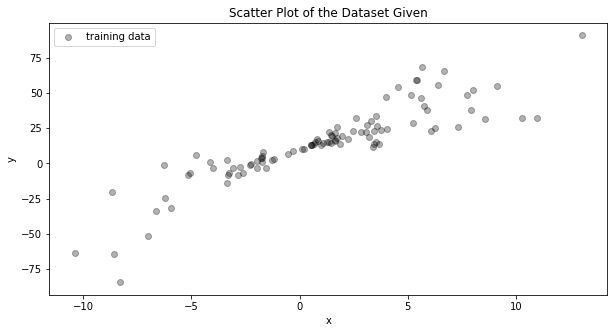

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(df['x'].values, df['y'].values, color='black', alpha=0.3, label='training data')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Scatter Plot of the Dataset Given')
ax.legend(loc='best')
plt.show()

We make an instance of the `LinearRegression` class and fit it to our data.

In [4]:
linear_model = LinearRegression()
x = df['x'].values.reshape((-1, 1))
y = df['y'].values
linear_model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Using our fitted `LinearRegression` model, we predict the $y$ values given the $x$ values of our training data. From this, we compute the residuals (individual prediction errors). 

From the fitted `LinearRegression` model we extract the regression parameters.

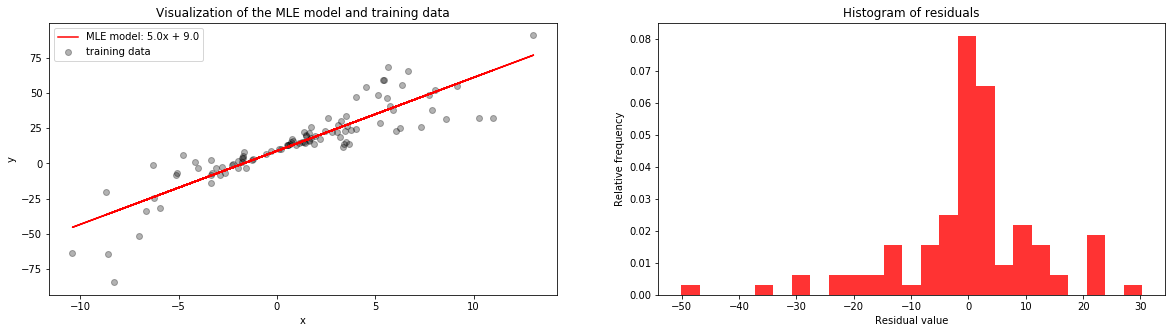

In [5]:
#use fitted model to predict on training data
y_predict = linear_model.predict(x)
#compute residuals
residuals = y - y_predict
#extract MLE for slope
slope_mle = np.round(linear_model.coef_[0])
#extract MLE for intercept
intercept_mle = np.round(linear_model.intercept_)

fig, ax = plt.subplots(1, 2, figsize=(20, 5))
#scatter plot training data
ax[0].scatter(df['x'].values, df['y'].values, color='black', alpha=0.3, label='training data')
#plot predction as a trend line
ax[0].plot(x, y_predict, color='red', label='MLE model: {}x + {}'.format(slope_mle, intercept_mle))

ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('Visualization of the MLE model and training data')
ax[0].legend(loc='best')

#plot a histogram of the residuals
ax[1].hist(residuals, bins=25, density=True, color='red', alpha=0.8)
ax[1].set_title('Histogram of residuals')
ax[1].set_xlabel('Residual value')
ax[1].set_ylabel('Relative frequency')
plt.show()

From the histogram of the residuals (on the left), we can see that (1) the residuals are not normally distributed as we assumed in our model (2) they are not centered at zero as we assumed. From the plot of the training data with our fitted model, we can see that (1) the trend or mean of the data looks to be linear, as we assumed, but (2) the y-values are not distributed about the trend in an equally noisy way. That is, for some values of $x$ the $y$ values vary greatly from the trend (the noise is high) and for some $x$ values the $y$ values closely follow the trend (the noise is low). I.e. the noise variance depends on the value of $x$.

We may conclude that a linear model may still be a good fit for the data, but our assumption that the noise is normally distributed and independent from $x$ do not seem to hold. 

So why would we care about the noise in the data or the distribution of the residuals? Well, the noise in the data affects our confidence in the model's prediction - the higher the noise, the more the true outcome will vary from the predicted outcome, even if the prediction is made with a function that perfectly captures the trend in the data. Knowing where the noise is high and low can help clinicians calibrate and mitigate the risk of making decisions based on the model's recommendations. If we did not check that our noise model actually captures the noise in the data (e.g. by checking the distributions of the residuals), a clinician might interpret the noise term in our probabilistic model to mean that the data is equally noisy everywhere, i.e. the model's predictions are equally reliable/unreliable for every patient.

Besides evaluating the model by looking at its predictive errors (e.g. residuals), we also need to "gut check" the model - i.e. by interpreting the model in the context of the application. We see that the slope of our linear model is positive, indicating that blood pressure increases as age increases - this overall makes sense (as we get older our blood pressure increase) but only up to a certain point (after a certain age, your blood pressure should decrease). Since our model is linear, it predicts that blood pressure increases monotonically with age and so after a certain age we can no longer rely on our model. We see that the y-intercept of our model is positive, this means that patients at age 0 (infants) would have a positive blood pressure measurement (this also generally makes sense).

Getting more specific, what does a slope of 5 mean in this application? Well the slope is the rate at which blood pressure increases as age increases. A slope of 5 means that the blood pressure increases by 5 units as age increases by 1 year. Is this clinically reasonable? Before we invest more time interpreting this slope of 5, we note that patient age is between -10 and 10 and blood pressure is between -75 and 75! Clearly these are not numbers that have real life interpretations as age and blood pressure! The ranges of $x$ and $y$ are this way because we have preprocessed the data by normalizing it (subtracting out the mean and scaling to make the standard deviation closer to 1). This type of data transformation is extremely common in a machine learning modeling pipeline, and as a data scientist or ML researcher working in a big team you are likely to receive the data already preprocessed. The problem is that this often makes interpreting the data difficult:

1. in this case, I don't know what was the mean and standard deviation of the original dataset and thus cannot rescale the data back to interpretable units

2. in general, working with preprocessed data coming from another source means that we may not know if any important features of the original dataset has been lost (e.g. how many outliers were removed? Were they true outliers? How many missing values were imputed? Was the method of imputation reasonable?)

In this case, since the data has been transformed, no only can we not interpret the specific values of the slope and y-intercept, the units of the x and y axes are no longer age and mm Hg!

**Optional (Uncertainty Quantification)** Compute the 95% [Confidence Interval (CI)](https://stattrek.com/estimation/confidence-interval.aspx) of the parameters you estimated for the dataset in `HW0_data.csv` by bootstrapping (this requires you to access the model parameters of the `LinearRegression` class). How confident are you in the 'correctness' or 'reliability' of your parameter estimates given the CI's?

  Compute the [Predictive Interval (PI)](https://otexts.com/fpp2/prediction-intervals.html) of a single prediction at $x=2$ by bootstrapping. How confident are you in your prediction for $x=2$ given the PI?
  
  *Hint: bootstrapping is the process of (1) generating multiple datasets (with equal size as the training data) that are similarly distributed as your training data by sampling your data with replacement, (2) estimating a quantity of interest repeatedly using these datasets. You can then empirically compute the percentile of interest from the bootstrap estimates of your quanity of interest.* 
  
  *Generating samples from your training data can be done using the `.sample()` function of the `pandas` `DataFrame` class.*
  
  *Computing percentiles of samples can be done using the `.percentile()` function of the `numpy` library.*
  
**Solutions:** We generate 100 bootrap samples of the training data, for each sample we compute the MLE for $w_0$ and $w_1$, we also compute a prediction at $x=2$ using the MLE estimates of $w_0$ and $w_1$. Since each bootstrap sample will be slightly different, we expect to get 100 different MLE estimates of $w_0$ and $w_1$, we also expect to get 100 different predictions at $x=2$. 

Computing the 95% interval of the different MLE estimates (CI) will tell us in what range most of the estimates lie. Computing the 95% interval of the predictions (PI) will tell us in what range most of our predictions lie.

In [6]:
#initialize lists for keeping track of different estimates of the slope and intercept
slopes = []
intercepts = []

#generate 100 bootstrap samples of the data and compute MLE estimates of parameters
for n in range(100):
    #sample the training data with replacement
    df_bootstrap = df.sample(frac=1., replace=True)
    x_bootstrap = df_bootstrap['x'].values.reshape((-1, 1))
    y_bootstrap = df_bootstrap['y'].values
    #fit a linear regression model on the bootstrap sample
    linear_model.fit(x_bootstrap, y_bootstrap)
    #extract the slope of the current model
    slopes.append(linear_model.coef_[0])
    #extract the intercept of the current model
    intercepts.append(linear_model.intercept_)

#compute the 2.5% and 97.5 cutoff's of the slope estimates
slope_lower = np.percentile(slopes, 2.5)
slope_higher = np.percentile(slopes, 97.5)
#compute the 2.5% and 97.5 cutoff's of the intercept estimates
intercept_lower = np.percentile(intercepts, 2.5)
intercept_higher = np.percentile(intercepts, 97.5)

#format the information as a pandas dataframe
CI_df = pd.DataFrame(data=[[intercept_mle, intercept_lower, intercept_higher], 
                           [slope_mle, slope_lower, slope_higher]],
                     index=['intercept', 'slope'],
                     columns=['MLE', '2.5 Percentile', '97.5 Percentile'])
CI_df

,MLE,2.5 Percentile,97.5 Percentile
intercept,9.0,6.516490,11.071864
slope,5.0,4.361854,6.063747


From the CI's, we can see that the MLE of the slope does not vary very much as we slightly change the training data. The MLE of the intercept varies much more. In practice, determining whether an estimate is unacceptably sensitive to slight changes in the input (high variance) requires knowing how the estimate affects a real-life task; in this case, we can generically say that the estimate of the MLE of the slope may be more certain than that of the intercept.

## Part II: Bayesian Linear Regression
### (Material covered in CS109 B or equivalent)
In this problem, your task is to perform Bayesian linear regression on the dataset in `HW0_data.csv`.

Assume that the outcome $y$ can be modeled by the following process:
\begin{aligned}
y &= f(x) + \epsilon = w_1x + w_0 + \epsilon, \quad \epsilon \sim \mathcal{N}(0, 0.5)\\
w_0 &\sim \mathcal{N}(0, 1)\\
w_1 &\sim \mathcal{N}(0, 0.5)
\end{aligned}
In this model, we assume the same likelihood as in Part I, but we also include priors for $w_0$ and $w_1$: $p(w_0) = \mathcal{N}(0, 1)$, $p(w_1) = \mathcal{N}(0, 0.5)$

1. **(Inference)** Analytically derive the joint posterior distribution over the parameters. That is, analytically compute<br><br>
\begin{aligned}
p(w_1, w_0 | y_1, \ldots y_n, x_1, \ldots, x_n) = \frac{\left(\prod_{n=1}^Np(y_n|x_n, w_1, w_0)\right)p(w_1)p(w_0)}{\prod_{n=1}^Np(y_n|x_n)}.\\
\end{aligned}
<br>*Hint: The posterior of a model with a Gaussian (or normal) likelihood and Gaussian priors is yet again Gaussian. This derivation is included in many machine learning textbooks like Machine Learning: a Probabilistic Perspective by Murphy or Pattern Recognition and Machine Learning by Bishop. This derivation also appears online in many course notes - you are welcomed to use any and all available resources.*
  
**Solution:** Using the matrix notation we introduced in Part I Problem 3, we can rewrite the likelihood using matrix notation:
\begin{aligned}
p(y_1, \ldots, y_n | x_1, \ldots, x_n, w_0, w_1) &= \prod_{n=1}^N\frac{1}{\sqrt{2\pi\sigma^2}} \mathrm{exp}\left\{  -\frac{1}{2\sigma^2}(y_n - (w_1x_n + w_0)^2)\right\}\\
&= \frac{1}{\sqrt{2\pi\sigma^2}^N} \mathrm{exp}\left\{  -\frac{1}{2\sigma^2}\sum_{n=1}^N(y_n - (w_1x_n + w_0)^2)\right\}\\
&= \frac{1}{\sqrt{2\pi\sigma^2}^N} \mathrm{exp}\left\{  -\frac{1}{2\sigma^2}(\mathbf{y} - \mathbf{X}w)^\top (\mathbf{y} - \mathbf{X}w)\right\}\\
&= \frac{1}{\sqrt{2\pi\sigma^2}^N} \mathrm{exp}\left\{  -\frac{1}{2}(\mathbf{y} - \mathbf{X}w)^\top(\sigma^2I_{2\times 2})^{-1} (\mathbf{y} - \mathbf{X}w)\right\}\\
&= \mathcal{N}(\mathbf{y}; \mathbf{X}w, \sigma^2I_{2\times 2})
\end{aligned}
where $I_{2\times 2}$ is the 2x2 identity matrix. We see that the joint likelihood is just a multivariate Gaussian with mean $\mathbf{X}w$ and a diagonal covariance matrix (the entries on the diagonal of this matrix is $\sigma^2$). Let's denote $\sigma^2I_{2\times 2}$ by $\Sigma$. 

Let's also express the prior as a multivariate Gaussian. Since the $p(w_0)$, $p(w_1)$ are both univariate Gaussians and we've assumed in our prior that they are independent, the joint distribution over $w_0$ and $w_1$ is a bivariate Gaussian with mean $m = [0\;\; 0]$ and covariance matrix $S = \left[\begin{array}{cc} 0.5 & 0\\ 0 & 1 \end{array} \right]$:
$$
w\sim \mathcal{N}\left([0\;\; 0], \left[\begin{array}{cc} 0.5 & 0\\ 0 & 1 \end{array} \right] \right).
$$

Now the posterior can be expressed as
\begin{aligned}
p(w | \mathbf{y}, \mathbf{X}) &= \frac{p(\mathbf{y} | \mathbf{X}, w)p(w)}{p(\mathbf{y} | \mathbf{X})}\\
&= \frac{\frac{1}{\sqrt{2\pi|\Sigma|}^N} \mathrm{exp}\left\{-\frac{1}{2} (\mathbf{X}w - \mathbf{y})^\top\Sigma^{-1}(\mathbf{X}w - \mathbf{y})\right\} \frac{1}{\sqrt{2\pi|S|}^2} \mathrm{exp}\left\{-\frac{1}{2} (w - m)^\top S^{-1}(w - m)\right\}}{p(\mathbf{y} | \mathbf{X})}\\
&= \frac{const * \mathrm{exp}\left\{-\frac{1}{2} (\mathbf{X}w - \mathbf{y})^\top\Sigma^{-1}(\mathbf{X}w - \mathbf{y}) + -\frac{1}{2} (w - m)^\top S^{-1}(w - m)\right\}}{const}\\
&=const * \mathrm{exp}\left\{-\frac{1}{2}\left(\mathbf{y}^\top\Sigma^{-1}\mathbf{y} - 2\mathbf{y}^\top \Sigma^{-1}\mathbf{X}w + w^\top\mathbf{X}^\top\Sigma^{-1}\mathbf{X}w + w^\top S^{-1}w - 2m^\top S^{-1} w + m^\top S^{-1}m \right)  \right\}\\
&= const * \mathrm{exp}\left\{ \mathbf{y}^\top\Sigma^{-1}\mathbf{y} + m^\top S^{-1}m \right\}\mathrm{exp}\left\{ w^\top \left(S^{-1} + \mathbf{X}^\top\Sigma^{-1}\mathbf{X}\right) w - 2\left(\mathbf{y}^\top \Sigma^{-1}\mathbf{X} + m^\top S^{-1} \right) w\right\}\\
&= const * \mathrm{exp}\left\{ w^\top \left(S^{-1} + \mathbf{X}^\top\Sigma^{-1}\mathbf{X}\right) w - 2\left(\mathbf{y}^\top \Sigma^{-1}\mathbf{X} + m^\top S^{-1} \right) w\right\}\\
&= const * \mathrm{exp}\left\{ w^\top A w - 2b w\right\}
\end{aligned}
where $A = \left(S^{-1} + \mathbf{X}^\top\Sigma^{-1}\mathbf{X}\right)$ and $b = \left(\mathbf{y}^\top \Sigma^{-1}\mathbf{X} + m^\top S^{-1} \right)$.

In the last line of the above, we see that the inside of the exponential function is almost a matrix square, to ***complete the square*** (and factor the expression) we need to add and subtract the term $bA b^\top$:
\begin{aligned}
p(w | \mathbf{y}, \mathbf{X}) &= const * \mathrm{exp}\left\{ w^\top A w - 2b w\right\}\\
&= const * \mathrm{exp}\left\{ w^\top A w - 2b w + bA b^\top- bA b^\top\right\}\\
&= const * \mathrm{exp}\left\{ (w - A^{-1}b^\top)^\top A(w - A^{-1}b^\top) - bA b^\top\right\}\\
&= const * \mathrm{exp}\left\{ - b^\top A b^\top\right\}\mathrm{exp}\left\{ (w - A^{-1}b^\top)^\top A(w - A^{-1}b^\top)\right\}\\
&= const * \mathrm{exp}\left\{ (w - A^{-1}b^\top)^\top A(w - A^{-1}b^\top)\right\}.
\end{aligned}

Finally, we see that the posterior $p(w | \mathbf{y}, \mathbf{X})$ has the form of a multivariate Gaussian, with mean $A^{-1}b$ and covariance $A^{-1}$. That is,
$$
p(w | \mathbf{y}, \mathbf{X}) = \mathcal{N}\left(\left(S^{-1} + \mathbf{X}^\top\Sigma^{-1}\mathbf{X}\right)^{-1} \left(\mathbf{y}^\top \Sigma^{-1}\mathbf{X} + m^\top S^{-1} \right)^\top, \left(S^{-1} + \mathbf{X}^\top\Sigma^{-1}\mathbf{X}\right)^{-1}\right).
$$
In our case, we have that $\Sigma^{-1} = 2I_{2\times2}$, $m = [0\;\; 0]$ and $S = \left[\begin{array}{cc} 0.5 & 0\\ 0 & 1 \end{array} \right]$. Hence, our posterior mean is
$$
\left(S^{-1} + \mathbf{X}^\top\Sigma^{-1}\mathbf{X}\right)^{-1} \left(\mathbf{y}^\top \Sigma^{-1}\mathbf{X} + m^\top S^{-1} \right)^\top = \left(S^{-1} + 2\mathbf{X}^\top\mathbf{X}\right)^{-1} \left(2\mathbf{X}^\top\mathbf{y} \right).
$$
Our posterior covariance is 
$$
(S^{-1} + 2\mathbf{X}^\top\mathbf{X})^{-1}
$$

2. **(Model Interpretation)** Visualize the ***joint posterior*** over the parameters, $p(w_1, w_0 | y, x)$ for the dataset in `HW0_data.csv` (you may use a scatter plot of samples drawn from the posterior or a contour map/heat map of the pdf). In separate plots, visualize the ***marginal posterior*** distribution over each parameter,
\begin{aligned}
p(w_1 | y_1, \ldots y_n, x_1, \ldots, x_n) &= \int_{w_0} p(w_1, w_0 | y_1, \ldots y_n, x_1, \ldots, x_n) dw_0\\
p(w_0 | y_1, \ldots y_n, x_1, \ldots, x_n) &= \int_{w_0} p(w_1, w_0 | y_1, \ldots y_n, x_1, \ldots, x_n) dw_1\\
\end{aligned}
  Is the information contained in the joint posterior $p(w_1, w_0 | y_1, \ldots y_n, x_1, \ldots, x_n)$ equivalent to the information contained in the two marginals $p(w_1 | y_1, \ldots y_n, x_1, \ldots, x_n), p(w_0 | y_1, \ldots y_n, x_1, \ldots, x_n)$? That is, what does each distribution tell you?<br><br>
*Hint: it is not necessary to analytically derive the marginals $p(w_i | y_1, \ldots y_n, x_1, \ldots, x_n)$. Recall that you can perform marginalization of a variable by sampling from the joint distribution and disregarding that variable.*
  
**Solution:** From #1, we see that the posterior $p(w | \mathbf{y}, \mathbf{X})$ is a bivariate Gaussian with mean $\mu$ and covariance $\Sigma$ defined as below:

\begin{aligned}
\mu &= \left(S^{-1} + 2\mathbf{X}^\top\mathbf{X}\right)^{-1} \left(2\mathbf{X}^\top\mathbf{y} \right)\\
\Sigma &= \left(S^{-1} + 2\mathbf{X}^\top\mathbf{X}\right)^{-1}\\
\end{aligned}

We visualize the joint posterior by sampling 100 points from $\mathcal{N}(\mu, \Sigma)$ and scatter plotting these points. 

For the posterior marginal distribution $p(w_0 | y_1, \ldots y_n, x_1, \ldots, x_n)$, we simply histogram the first coordinates (representing $w_0$) of these 100 samples (disregarding the second coordinate). The same can be done for $p(w_1 | y_1, \ldots y_n, x_1, \ldots, x_n)$.

In [7]:
x_matrix = np.hstack((x.reshape((-1, 1)), np.ones(x.shape)))
y_matrix = y.reshape((-1, 1))

prior_variance = np.diag((0.5, 1))
prior_precision = np.linalg.inv(prior_variance)

#defining the posterior variance
joint_variance = np.linalg.inv(prior_precision + 2 * x_matrix.T.dot(x_matrix))
#defining the posterior mean
joint_mean = joint_variance.dot(x_matrix.T.dot(y_matrix)) * 2

#sampling 100 points from the posterior
posterior_samples = np.random.multivariate_normal(joint_mean.flatten(), joint_variance, size=200)

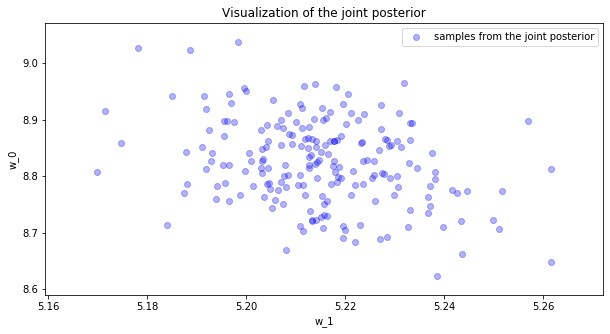

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
#visualize the joint posterior
ax.scatter(posterior_samples[:, 0], posterior_samples[:, 1], color='blue', alpha=0.3, label='samples from the joint posterior')

ax.set_xlabel('w_1')
ax.set_ylabel('w_0')
ax.set_title('Visualization of the joint posterior')
ax.legend(loc='best')
plt.show()

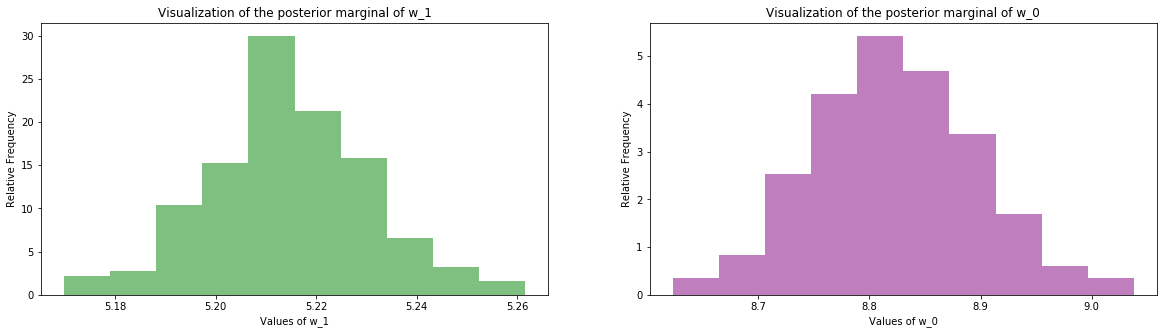

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
#visualize the posterior marginal of w_0
ax[0].hist(posterior_samples[:, 0], density=True, color='green', bins=10, alpha=0.5)
ax[0].set_xlabel('Values of w_1')
ax[0].set_ylabel('Relative Frequency')
ax[0].set_title('Visualization of the posterior marginal of w_1')
#visualize the posterior marginal of w_1
ax[1].hist(posterior_samples[:, 1], density=True, color='purple', bins=10, alpha=0.5)
ax[1].set_xlabel('Values of w_0')
ax[1].set_ylabel('Relative Frequency')
ax[1].set_title('Visualization of the posterior marginal of w_0')
plt.show()

The information contained in the joint posterior is not equivalent to the two marginals. The posterior marginals alone tell you how each parameter is distributed but does they cannot tell you how the two parameters are correlated, and such correlations is important for understanding how the parameters are related. For example, if the slope is estimated to be 4, then in order to produce a good fit for the data, our choices of the intercept must be limited to a specific range. The joint posterior distribution describes both the independent distributions of each parameter as well as their correlation (from the visualization of the joint, you can see that the Gaussian has a slight negative trend -- i.e. slope and intercept are negatively correlated).

3. **(Prediction)** In Bayesian linear regression, we obtain a distribution over possible parameters given the data, $p(w_1, w_0 | y_1, \ldots y_n, x_1, \ldots, x_n)$, rather than a single ***point-estimate*** of the 'best' parameters. This means that when we predict an outcome for, say, $x=2$ we get a distribution over possible values of $y$ rather than a single $y$. The distribution over the predicted $y$ for a given $x$ is called the ***posterior predictive***, and is denoted $p(y|x)$.

  Visualize the **95% posterior predictive interval** (this is the interval that includes 95% of the posterior predictive values) for the training data -- this is usually visualized as a shaded tube containing the 95% of the posterior predictive values for each test $x$-value. 
  
  What does the 95% posterior predictive interval tell you about the model's uncertainty in its predictions?
  
**Solution:** Each sample $(w_0, w_1)$ from the posterior $p(w_0, w_1 | y_1, \ldots y_n, x_1, \ldots, x_n)$ represents a linear model and hence can be used to predict the $y$ value at any given $x$. We use our 100 posterior samples to produce 100 predictions at each $x$. The posterior predictive is then given by sampling an observation noise for each prediction and adding the noise to the prediction. This is because the posterior predictive distribution defined in terms of the posterior over $w_0, w_1$ and the **likelihood**, which is a normal distribution centered at $f(x)$. Thus, sampling from the likelihoood is equivalent to adding a noise term to our predictions.

In [19]:
x_range = np.linspace(-11, 11, 100)
f = lambda w_0, w_1: w_1 * x_range + w_0

#predict y for every sample in the posterior
posterior_predictive_samples = [f(sample[0], sample[1]) + np.random.normal(0, 0.5**0.5, size=x_range.shape) for sample in posterior_samples]
posterior_predictive_samples = np.array(posterior_predictive_samples)

#compute the 97.5 th percentile of the posterior predictive predictions
pp_upper = np.percentile(posterior_predictive_samples, 97.5, axis=0)

#compute the 2.5 th percentile of the posterior predictive predictions
pp_lower = np.percentile(posterior_predictive_samples, 2.5, axis=0)

#compute the 50 th percentile of the posterior predictive predictions
pp_mean = np.mean(posterior_predictive_samples, axis=0)

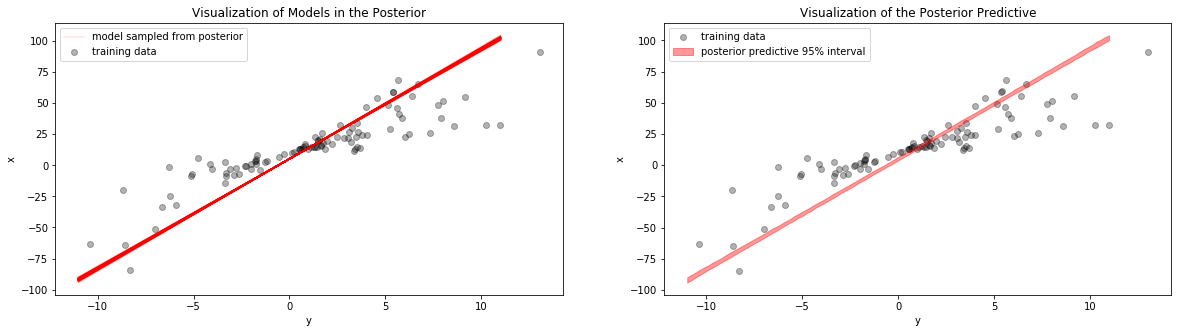

In [26]:

fig, ax = plt.subplots(1, 2, figsize=(20, 5))

#scatter plot training data
ax[0].scatter(df['x'].values, df['y'].values, color='black', alpha=0.3, label='training data')

i = 0
for sample in posterior_samples:
    if i == 0:
        ax[0].plot(x_range, f(sample[0], sample[1]), color='red', alpha=0.1, label='model sampled from posterior')
    else:
        ax[0].plot(x_range, f(sample[0], sample[1]), color='red', alpha=0.1)
    i += 1

ax[0].set_xlabel('y')
ax[0].set_ylabel('x')
ax[0].set_title('Visualization of Models in the Posterior')
ax[0].legend(loc='best')

#scatter plot training data
ax[1].scatter(df['x'].values, df['y'].values, color='black', alpha=0.3, label='training data')
ax[1].fill_between(x_range, pp_upper, pp_lower, color='red', alpha=0.4, label='posterior predictive 95% interval')
ax[1].set_xlabel('y')
ax[1].set_ylabel('x')
ax[1].set_title('Visualization of the Posterior Predictive')
ax[1].legend(loc='best')
plt.show()

The 95% posterior predictive interval is very narrow! This means that the Bayesian model is pretty confident in its predictions for every data point. But if we were to use the uncertainty of this model as an indicator of when we should trust the model we would be mislead, since clearly the model will be more inaccurate for older and younger patients - i.e. we should not trust the model equally for all patients!

---

## Part III: Broader Impact Analysis

You've now modeled the same set of data using non-Bayesian and Bayesian regression models. In both paradigms it's possible to identify a 'best' set of model parameters (in the non-Bayesian approach, we compute the MLE; in the Bayesian approach, we can compute the mean or mode of the posterior). For the Bayesian model, we also quantified our uncertainty in the model parameters as well as our uncertainty in the model's predictions. So which model, if any, should we deploy in real life?

Starting in 2020, major machine learning conferences are beginning to ask authors as well as reviewers to explicitly consider the broader impact of new machine learning methods. To properly evaluate the potential good or harm that a piece of technology (AI or not) can do to the general public, we need to be aware that no technology is deployed in ideal conditions or in perfectly neutral contexts. In order to assess the potential broader impact of technology, we need to analyze the social systems/institutions of which these technologies will become a part.

To help you analyze the broader impact of your technology, begin by considering the following questions:

I. Identify the relevant socio-technical systems
  - In what social, political, economic system could the tech be deployed?
  - How would the tech be used in these systems (what role will it take in the decision making processes)?<br><br>
  
II. Identify the stakeholders
  - Who are the users?
  - Who are the affected communities (are these the users)?
  
    ***Hint:*** users are typically decision makers who will use the technology as decision aids (e.g. doctors), whereas affected communities may be folks who are impacted by these decisions but who are not represented in the decision making process (e.g. patients).<br><br>
    
III. What types of harm can this tech do?
  - What kinds of failures can this tech have?
  - What kinds of direct harm can these failures cause?
  - What kinds of harm can the socio-technical system cause?
  
    ***Hint:*** many technical innovations have niche applications, they may sit in a long chain of decision making in a complex system. As such, it may seem, at first glance, that these technologies have no immediate real-life impact. In these cases, it’s helpful to think about the impact of the entire system and then think about how the proposed innovations aid, hamper or change the goals or outcomes of this system.<br><br>
    
IV. What types of good can this tech do?
  - What kinds of needs do these users/communities have?
  - What kinds of constraints do these users/communities have?

1. **(Impact)** Analyze the broader impact of these two models. Specifically, focus on anticipating ways these models can interact with other components of the decision systems in which they will be deployed, identifying end-users, affected communities as well as anticipating the effects (positive and negative) on affected communities (in particular, does the model have the same effect on all subpopulations in the affected communities?).

  **Solutions:** This is an example of an impact analysis, we expect that each student explore a broad range of impact as well as focus on aspects of the impact that strike them as particularly significant.

  The end-users of both model would be doctors and nurses, but the community affected would primarily be patients. From the visualizations and the other metrics for evaluation, we see that both models make good predictions for patients from age 40-50, while the models' predictive error become increasingly large as age increases or decreases. So the the models' predictions would be unreliable for younger and older patient populations. 

  Should these model be deployed in real clinical settings? This can be a complicated question. Since these model are very predictive for a subset of patients, if these predictions can improve patient outcome we can make a strong argument that this model should be used, as long as we can accurately identify patients for whom the model cannot make good predictions. However, one might also argue that depolying a model that works only for a subpopulation can exaggerate disparities and inequities in health outcomes. Rather than accepting that only a portion of the patient population can benifit from the model, we might spend some effort to fit a different model that can improve outcomes for a larger population of patients.

2. **(Mitigation)** Which model, if any, would you recommend to deploy? Why? 

  What information should the ML designer/engineer disclose to the end-users to mitigate potential negative impacts?
  
  **Solutions:** This is an example of a mitigation analysis, we expect that each student explore a broad range of mitigation methods as well as focus on methods that strike them as particularly significant.
  
  The MLE model is certainly undesirable for naive deployment, since the predictiveness of the model is poor for older and younger patients and the noise model indicates that the residuals are equally large/small for every group of patients, and this may lead to false confidence in clinical users. 
  
  While the Bayesian model provides some predictive uncertainty, these uncertainties are constant for every group of patients - again this may mislead clinicians when consulting this model. The fact that the Bayesian model did not fix the issues with the MLE model is not surprising - the Bayesian model and the MLE model share the same likelihood and hence the same noise model and it is precisely this noise model that is inappropriate for the data.
  
  In both cases, if the models were to be deployed the users must be informed of the populations for which the models' predictions are completely unreliable. The clinicians might find it interesting/helpful to know that the outcomes for older and younger patients exhibit a lot more variations.